# Project 2: Business Statistics: Axis Insurance

# Objective

Statistical Analysis of Business Data. Explore the dataset and extract insights from the data. The idea is for you to get comfortable with doing statistical analysis in Python.

You are expected to do the following:

*Explore the dataset and extract insights using Exploratory Data Analysis.
*Prove (or disprove) that the medical claims made by the people who smoke is greater than those who don't? [Hint- Formulate a hypothesis and prove/disprove it]
*Prove (or disprove) with statistical evidence that the BMI of females is different from that of males.
*Is the proportion of smokers significantly different across different regions? [Hint : Create a contingency table/cross tab, Use the function : stats.chi2_contingency()]
*Is the mean BMI of women with no children, one child, and two children the same? Explain your answer with statistical evidence.
*Consider a significance level of 0.05 for all tests.

# Data

* Age - This is an integer indicating the age of the primary beneficiary (excluding those above 64 years, since they are generally covered by the government).
* Sex - This is the policy holder's gender, either male or female.
* BMI - This is the body mass index (BMI), which provides a sense of how over or underweight a person is relative to their height. BMI is equal to weight (in kilograms) divided by height (in meters) squared. An ideal BMI is within the range of 18.5 to 24.9.
* Children - This is an integer indicating the number of children/dependents covered by the insurance plan.
* Smoker - This is yes or no depending on whether the insured regularly smokes tobacco.
* Region - This is the beneficiary's place of residence in the U.S., divided into four geographic regions - northeast, southeast, southwest, or northwest.
* Charges - Individual medical costs billed to health insurance

In [1]:
# clear warnings

import warnings
warnings.filterwarnings('ignore')

## Import Libraries


In [2]:
# import necessary python libraries

import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

## Import the dataset and make a copy


In [3]:
data = pd.read_csv('AxisInsurance.csv') #import dataset
df = data.copy() #make a copy of data

### View the first and last 5 rows of the dataset.

In [4]:
# view first 5 row to get a wuick look at the dataset

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
# view the last 5 rows to check for anomolies in the dataset such as summary rows

df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


* There are no summary rows at the bottom of the dataset which could cause errors in our analysis

### Understand the shape of the dataset

In [6]:
# checl number of rows and columns

df.shape

(1338, 7)

* Data set has 1338 rows and 7 columns

### Check the data types of the columns for the dataset.

In [7]:
# take a look at datatypes and count of variables in each column

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## Fixing the data types
* All variables are either Integer or Float except for Sex, Smoker, and Region which are object types and will be changed to categories

`coverting "objects" to "category" reduces the data space required to store the dataframe`

In [8]:
# convert objects to categories

df['sex'] = df.sex.astype('category') #convert sex object to category
df['smoker'] = df.smoker.astype('category') #convert smoker object to category
df['region'] = df.region.astype('category') #convert region object to category

df.info() #check if conversion of objects to categories was successful

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   category
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   int64   
 4   smoker    1338 non-null   category
 5   region    1338 non-null   category
 6   charges   1338 non-null   float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 46.2 KB


* object variabes have been successfully converted to categories

`memory usage has been reduced from 73.3 KB to 46.2 KB`

* there are no null values in any column

## Provide a quick statistical summary of the dataset

In [9]:
# take a look and basic descriptive statistics of the numerical variables in the dataset

df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


* Age, BMI, and Children have approximately the same Mean and Median
* Mean is higher than the median for Charges suggesting a left skew in the dataset. The max of $63,770 seems to indicate a long tail toward the upper end with some customer having high medical charges



In [10]:
# take a look at the categorical values in the dataset

df.describe(include='category')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


* males (676) make up the majority of participants in the study
* most persons are non-smokers (1064)
* the southeast is the most common region (364)

## Check for missing values

In [11]:
# double check for null values in the dataset

df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

* There are no missing values in the dataset

## Exploratory Data Analysis

### Univariate Analysis

## Define function to create combination graph of boxplot and histogram

In [12]:
# using function from earlier lesson to check skewness using combination graph of boxplot and histogram 
# this is a useful tool for doing univariate analysis of numerical values to study central tendency and dispersion

def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(feature, kde=True, ax=ax_hist2, bins=bins, pallette='winter') if bins else sns.histplot(feature, kde=True, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

## Observe Age

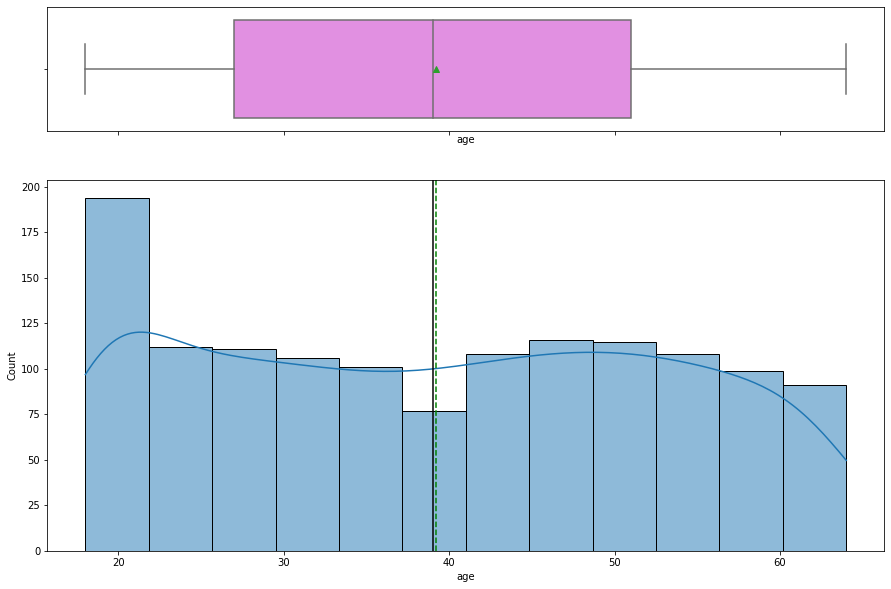

In [13]:
histogram_boxplot(df.age)

* The data seem fairly evenly distributed with a very slight skew to the left
* There does not appear to be outliers in this data
* Mean and median are approximately equal

## Observe BMI 

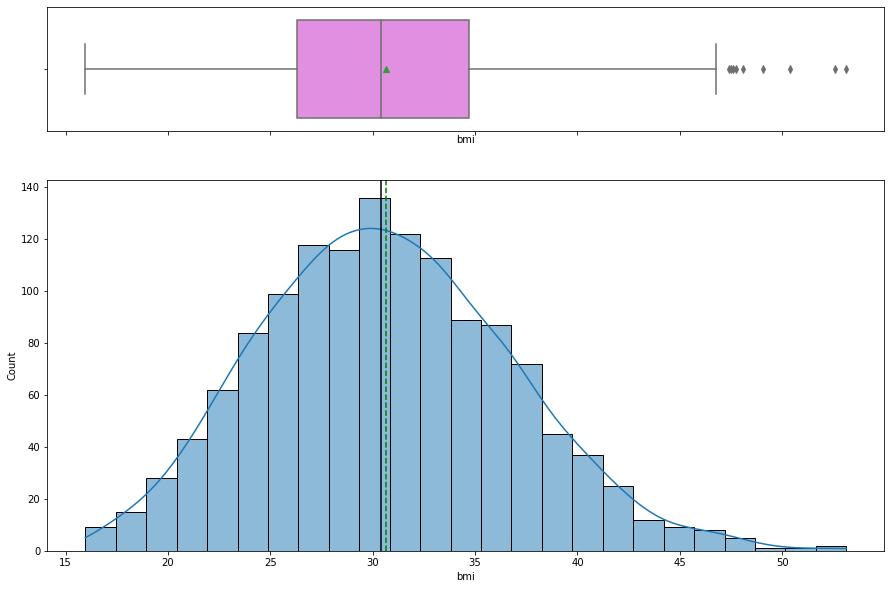

In [14]:
histogram_boxplot(df.bmi)

* the data appears normally distributed
* mean and median are close in value
* there are multiple outliers in the higher range of the bmi data

## Observe Children

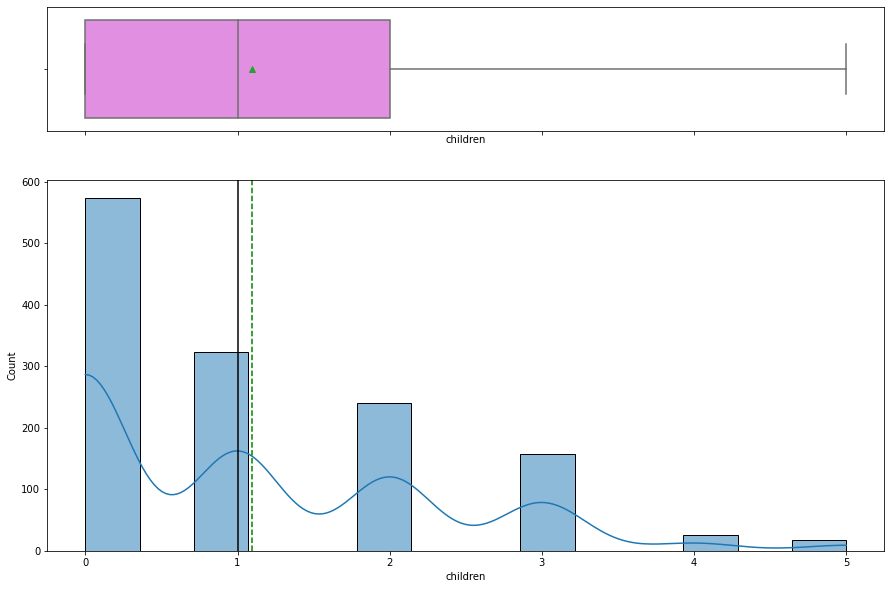

In [15]:
histogram_boxplot(df.children)

* The dataset is highly left skewed towards 0 children
* On average customers have 1 child 
* Number of children per customer declines as the number increases with the maximum being 5.
* 25% of customers have 2 or more children


## Observe Charges

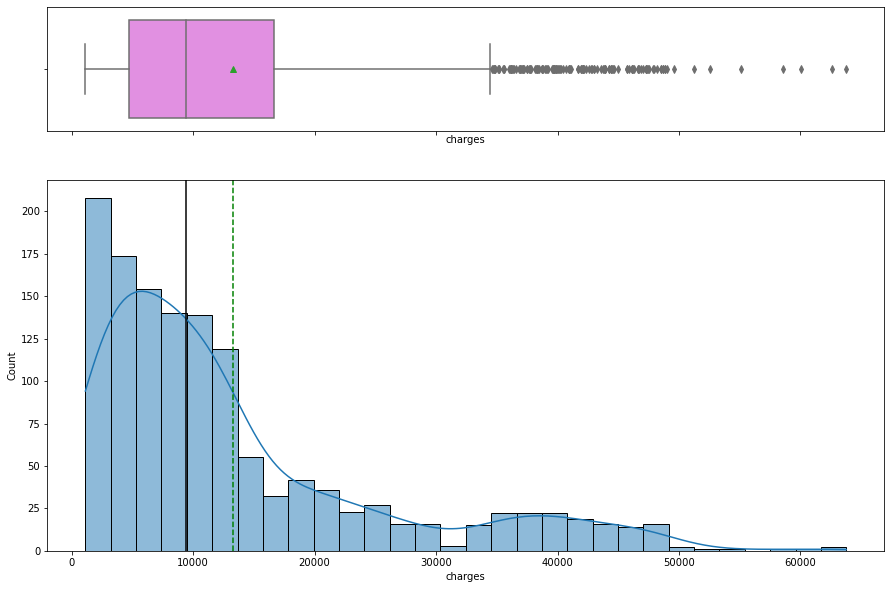

In [16]:
histogram_boxplot(df.charges)

* The dataset for charges is left skewed indicating most customers have low medical costs but there are a fair amount of outliers in the long-tail with higher charges



## Create Function to add percentage to barplots

In [17]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage 
    plt.show() # show the plot

## Observations on sex

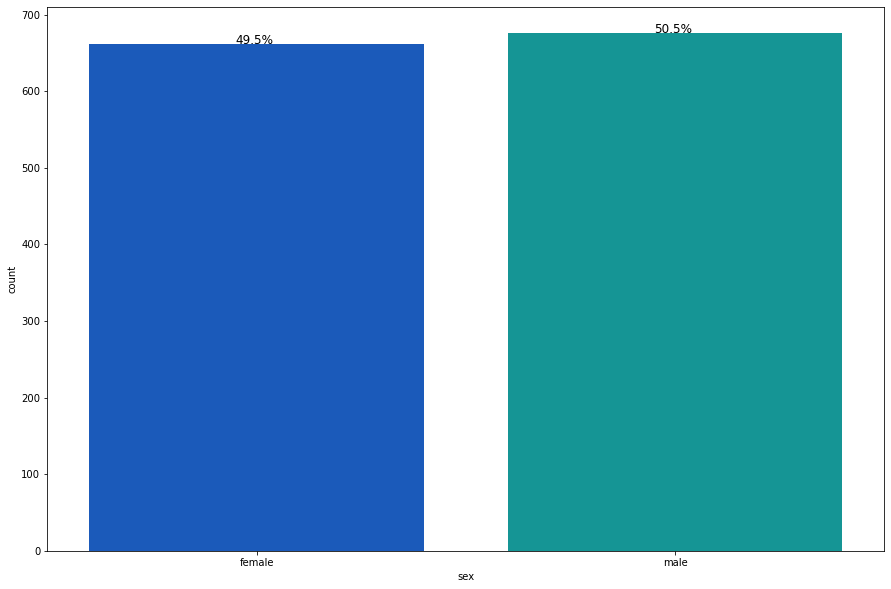

In [18]:
plt.figure(figsize=(15,10))
ax = sns.countplot(df["sex"],palette='winter')
perc_on_bar(ax,df["sex"])

* Almost evenly split between Male (50.5%) and Female (40.5%) with Males holding a slight edge.

## Observations on Smoking Status

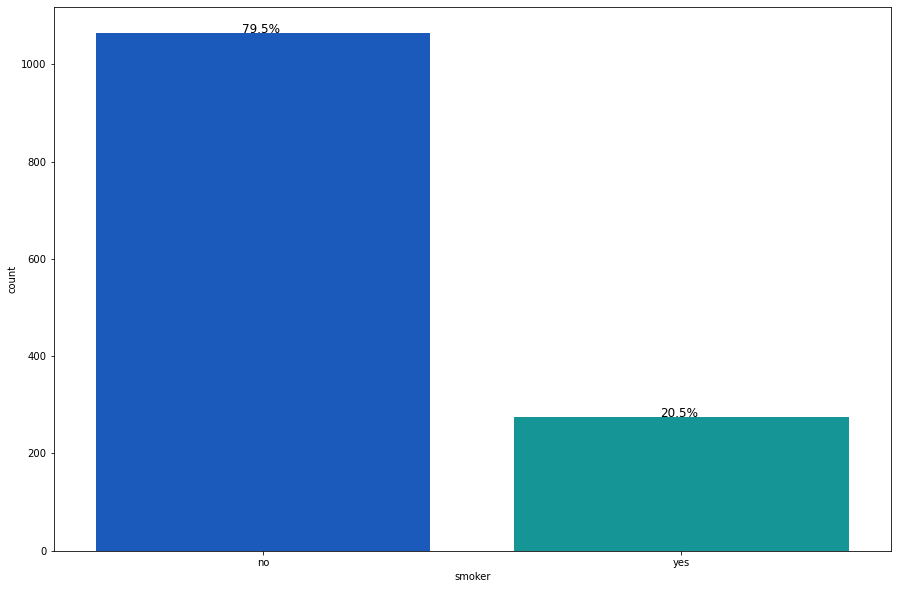

In [19]:
plt.figure(figsize=(15,10))
ax = sns.countplot(df["smoker"],palette='winter')
perc_on_bar(ax,df["smoker"])

* The majority of those surveyed identified as non-smokers 79.5% to smokers at 20.5%

## Observations on Region

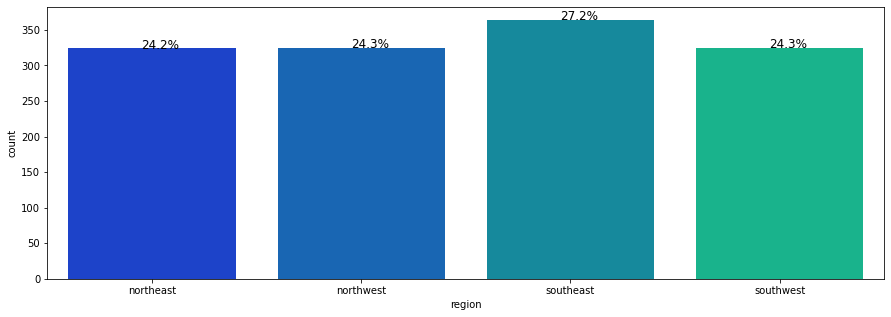

In [20]:
plt.figure(figsize=(15,5))
ax = sns.countplot(df["region"],palette='winter')
perc_on_bar(ax,df["region"])

* There are four regions reported in the dataset Northeast (24.2%), Northwest (24.3%), Southeast (27.2%), Southwest (24.3%)
* Regions are mostly evenly divided with Southeast having a slight majority with 27.2%

## Bivariate Analysis

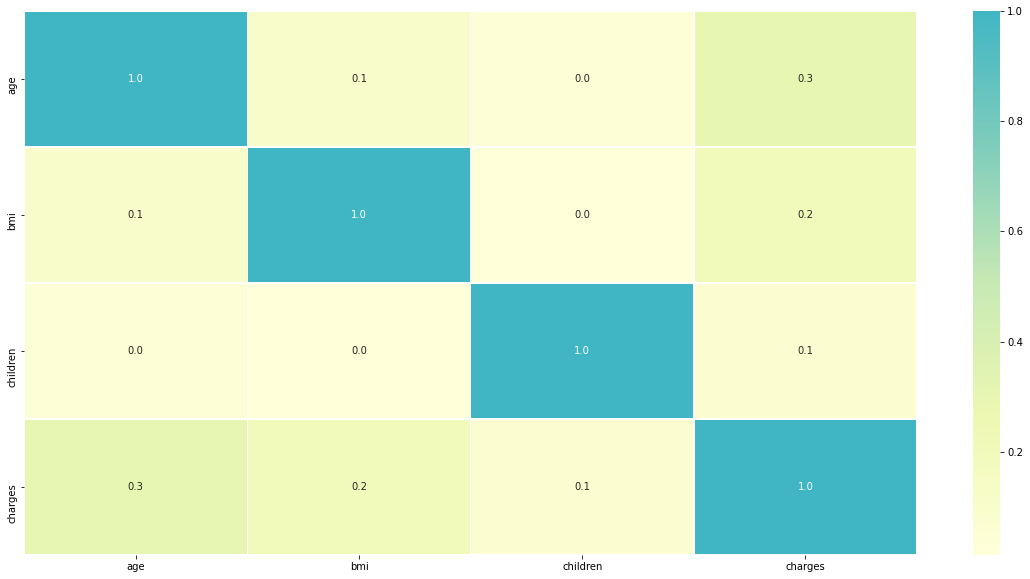

In [21]:
# heatmap of numerical values

plt.figure(figsize=(20,10)) # set size of plot
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f', center = 1, cmap='YlGnBu')  # set line widths, format, and color
plt.show()

* Correlations between the various numerical variables are weak
* Age and Charges have the strongest correlation but it is just 0.3. This shows that the amount of medical costs billed to health insurance does not have a strong relationship with age as one would expect. This is worthy of further analysis.

## Sex vs BMI 

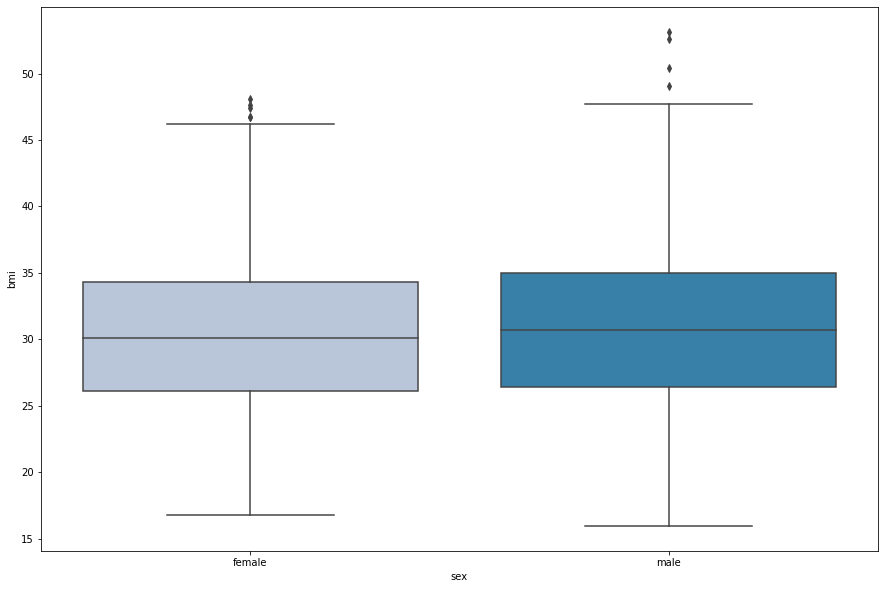

In [22]:
plt.figure(figsize=(15,10))
sns.boxplot(df["sex"],df["bmi"],palette="PuBu")
plt.show()

In [23]:
df.groupby('sex')['bmi'].mean()

sex
female    30.377749
male      30.943129
Name: bmi, dtype: float64

* The BMI of both sexes seems to be similar with a few outliers in the upper range for both sexes but slightly more for men
* Visual observation of the above boxplot does not seem to indicate a substantial difference in BMI when accounting for sex

## Smoker vs BMI 


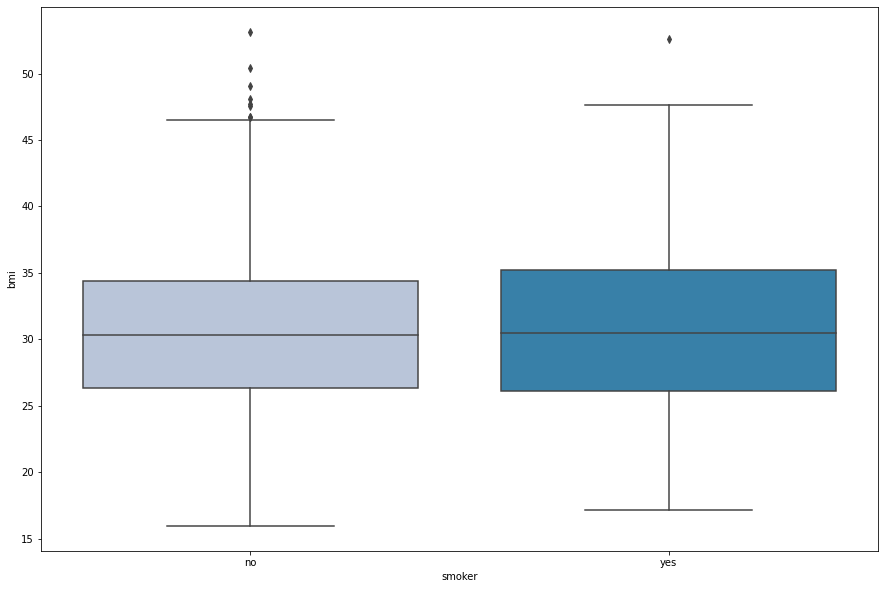

In [24]:
plt.figure(figsize=(15,10))
sns.boxplot(df["smoker"],df["bmi"],palette="PuBu")
plt.show()

In [25]:
df.groupby('smoker')['bmi'].mean()

smoker
no     30.651795
yes    30.708449
Name: bmi, dtype: float64

* The BMI for smokers and non-smokers appear similar with the exception of a few outliers in non-smokers and one outlier in smokers

## Sex vs BMI vs Smoker

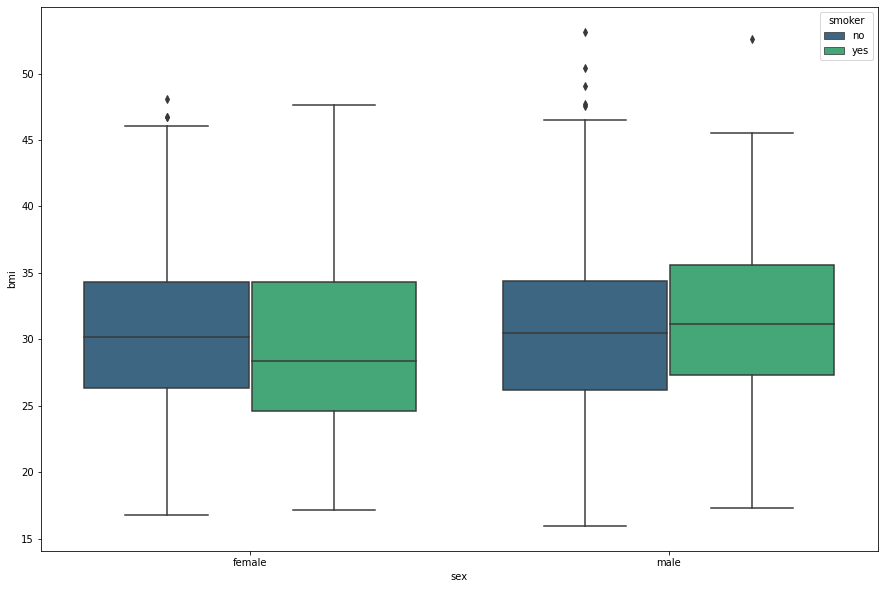

In [26]:
plt.figure(figsize=(15,10))
sns.boxplot(df["sex"],df["bmi"],hue = df["smoker"],palette="viridis")
plt.show()

**When we break out BMI by sex and smokers we see greater detail**
* The median BMI of females who smoke is lower than male smokers (there is one male outlier)
* The median BMI of non-smokers seems to be about the same regardless of sex (there are several outliers for both sexes)

## Sex vs BMI vs Children

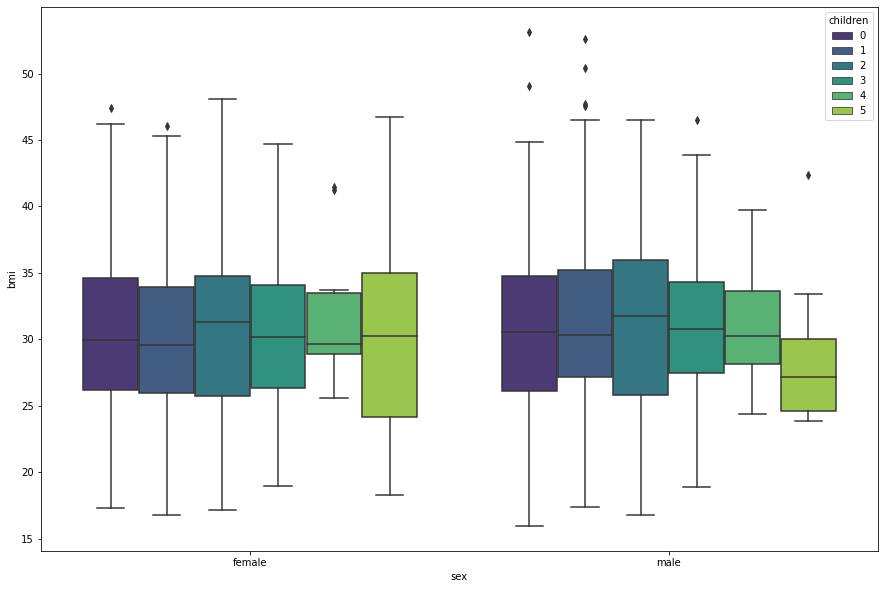

In [27]:
plt.figure(figsize=(15,10))
sns.boxplot(df["sex"],df["bmi"],hue = df["children"],palette="viridis")
plt.show()

* BMI increases with the second child but declines from that level with 3 or more children
* Females increase BMI with 2-4 children but with 5 children return to about the same level as women with no children
* Men with 5 children have the lowest BMI of any group in this plot

## Region vs BMI

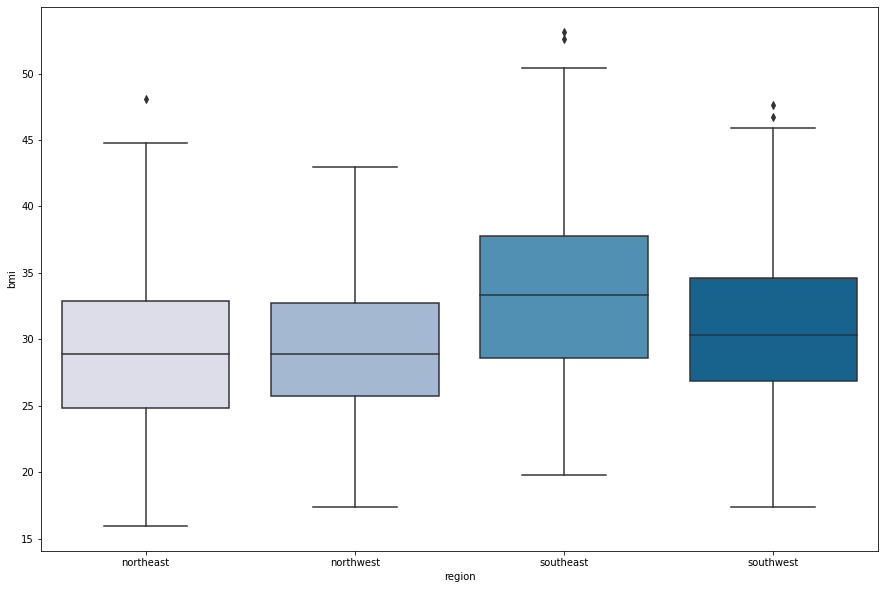

In [28]:
plt.figure(figsize=(15,10))
sns.boxplot(df["region"],df["bmi"],palette="PuBu")
plt.show()

In [29]:
df.groupby('region')['bmi'].mean()

region
northeast    29.173503
northwest    29.199785
southeast    33.355989
southwest    30.596615
Name: bmi, dtype: float64

* Customers in the Southeast region tend to have higher BMIs than customers in the other three regions

## Sex vs Charges

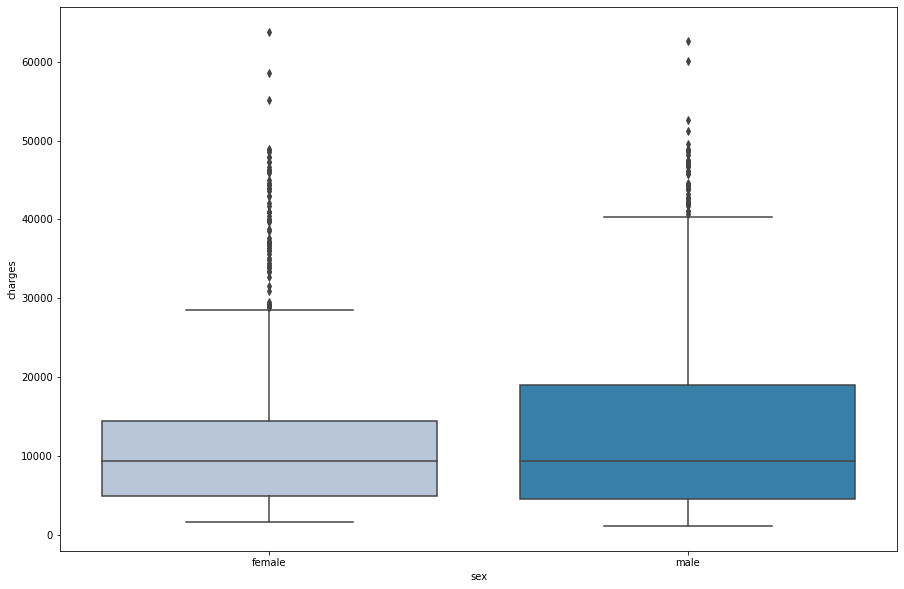

In [30]:
plt.figure(figsize=(15,10))
sns.boxplot(df["sex"],df["charges"],palette="PuBu")
plt.show()

* Males have a wider range of charges than females but median charges appear the same regardless of sex
* Both sexes have many outliers at the upper end of charges 

## Region vs Charges

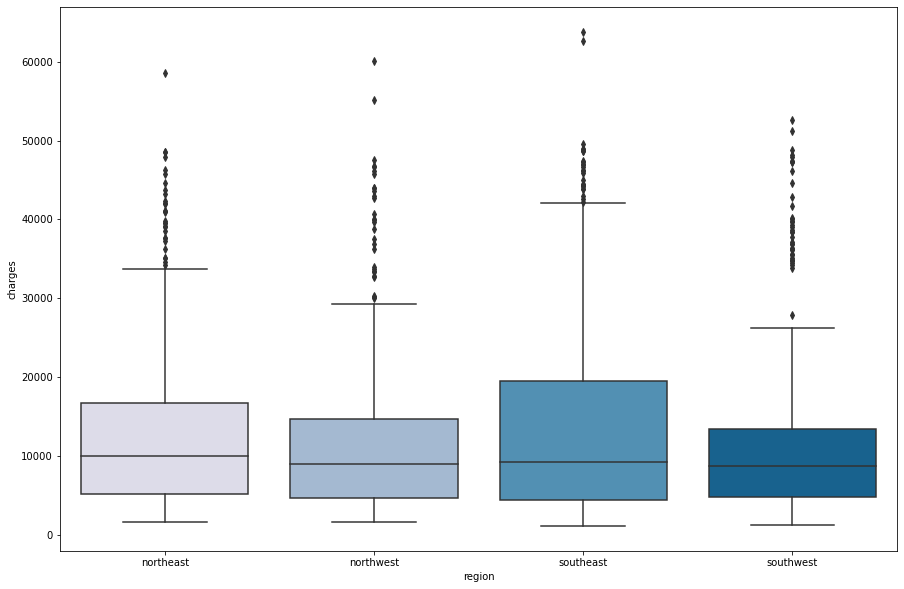

In [31]:
plt.figure(figsize=(15,10))
sns.boxplot(df["region"],df["charges"],palette="PuBu")
plt.show()

* Median charges across regions is similar however, the southeast seems to have a wider range and slightly higher amount of charges per customer.
* It will be helpful to explore the amount of smokers per region to learn if this is affecting the amount of charges per region

## Smoker vs Charges

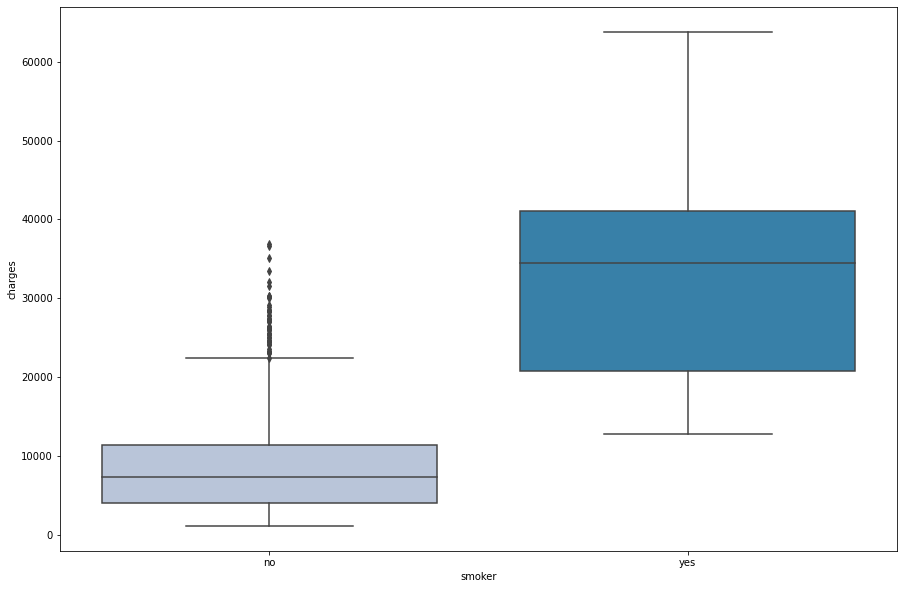

In [32]:
plt.figure(figsize=(15,10))
sns.boxplot(df["smoker"],df["charges"],palette="PuBu")
plt.show()

In [33]:
df.groupby('smoker')['charges'].mean()

smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64

* Customers who smoke account for much higher medical charges than non-smoking customers 

## Sex vs Charges vs Children

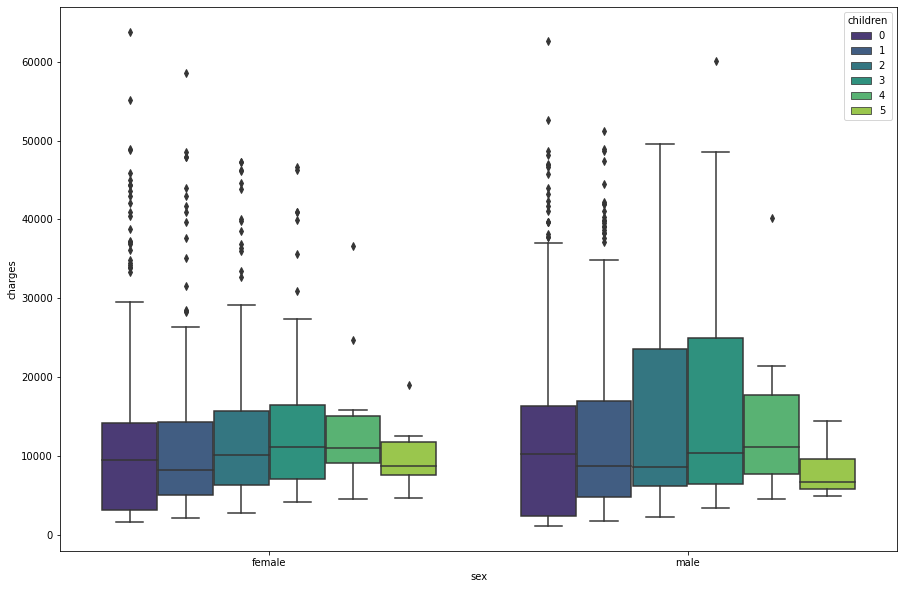

In [34]:
plt.figure(figsize=(15,10))
sns.boxplot(df["sex"],df["charges"],hue = df["children"],palette="viridis")
plt.show()

* Women with 3 - 4 children tend to have the highest medical charges not accounting for smoking status

## Region vs Smoker

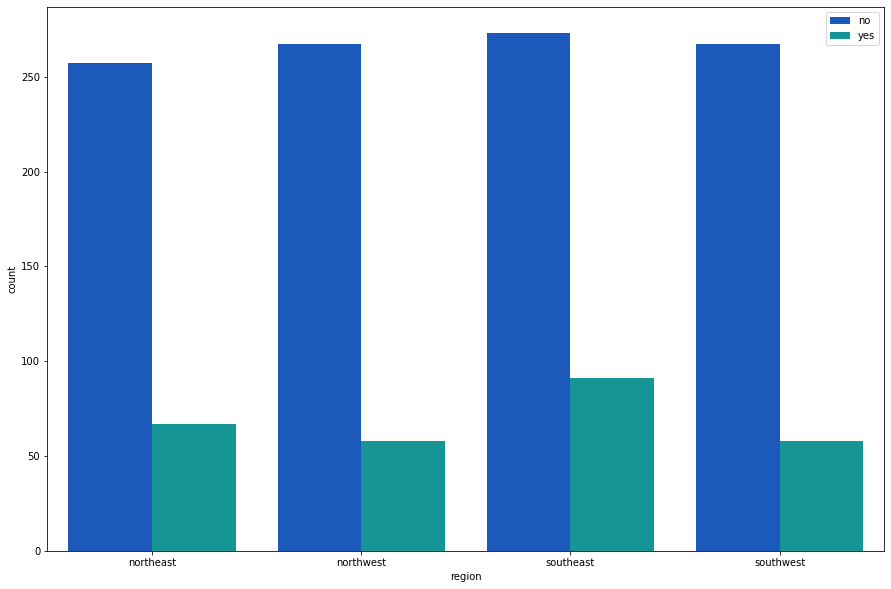

In [35]:
plt.figure(figsize=(15,10))
sns.countplot(df["region"],hue=df["smoker"],palette='winter')
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

* Southeast have the most smokers which fits with the amount of charges seen in the boxplot seen earlier

## Sex vs Smoker

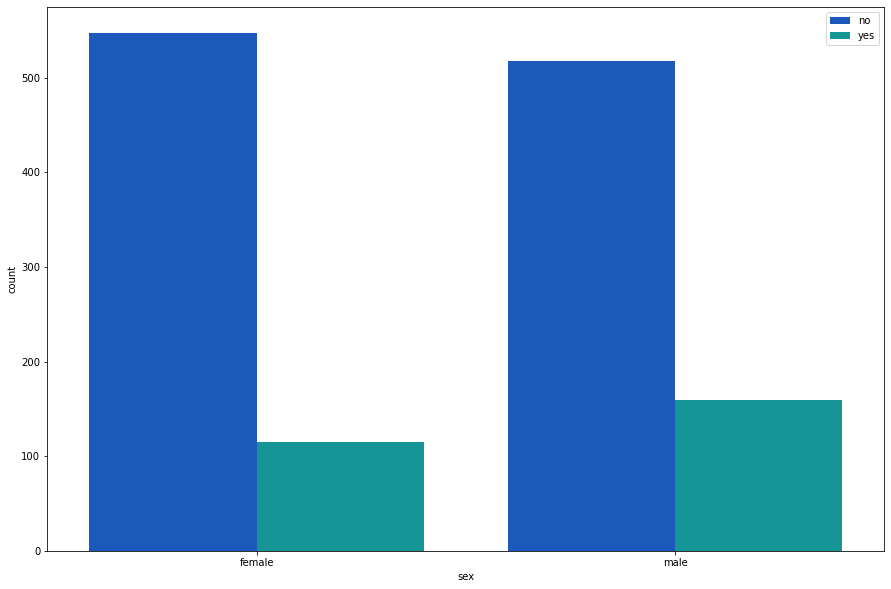

In [36]:
plt.figure(figsize=(15,10))
sns.countplot(df["sex"],hue=df["smoker"],palette='winter')
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

## 

* More male customers smoke than do females

## Smoking vs Children vs Charges

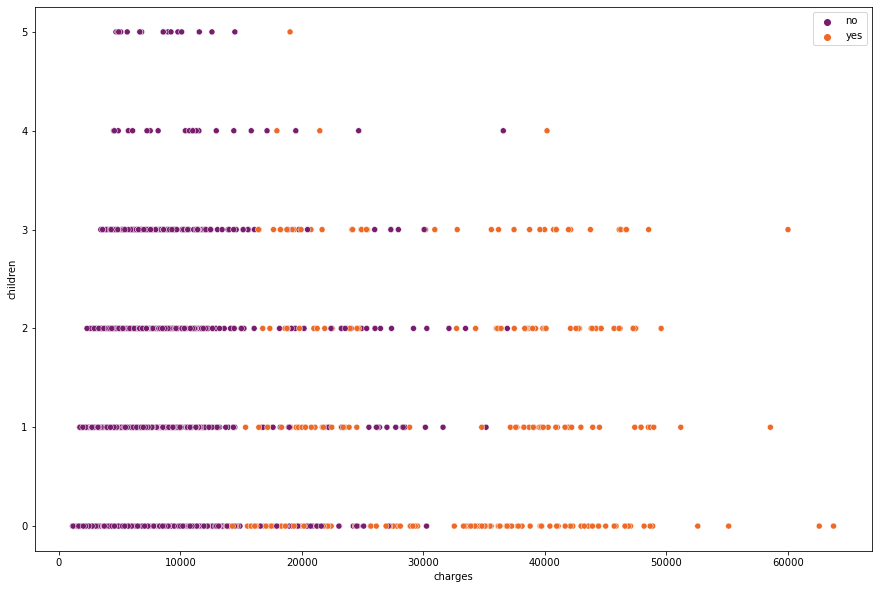

In [37]:
plt.figure(figsize=(15,10))
sns.scatterplot(df["charges"],df["children"],hue=df["smoker"],ci=0,palette="inferno")
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

* Smoking status is more responsible for medical charges than are number of children/dependents

In [38]:
df.groupby('children')['charges'].mean()

children
0    12365.975602
1    12731.171832
2    15073.563734
3    15355.318367
4    13850.656311
5     8786.035247
Name: charges, dtype: float64

In [39]:
df.groupby('smoker')['charges'].mean()

smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64

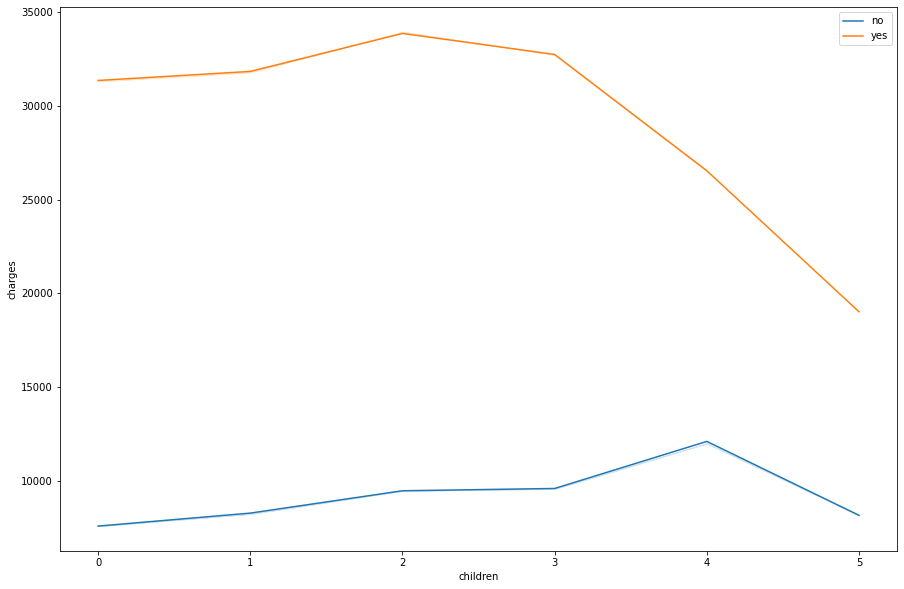

In [40]:
plt.figure(figsize=(15,10))
sns.lineplot(df["children"],df["charges"],hue=df["smoker"],ci=0)
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

## BMI vs Charges vs Smoker

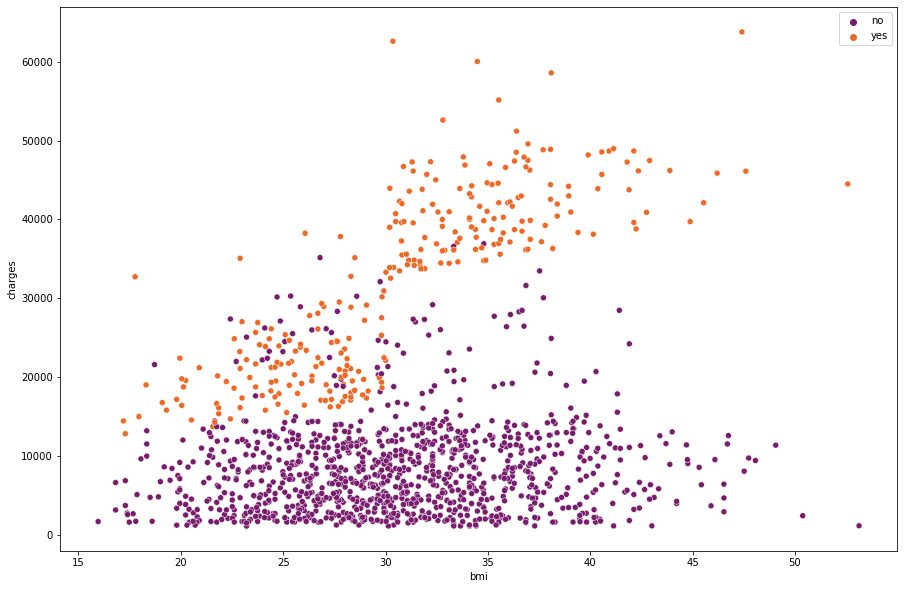

In [41]:
plt.figure(figsize=(15,10))
sns.scatterplot(df["bmi"],df["charges"],hue=df["smoker"],ci=0,palette="inferno")
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

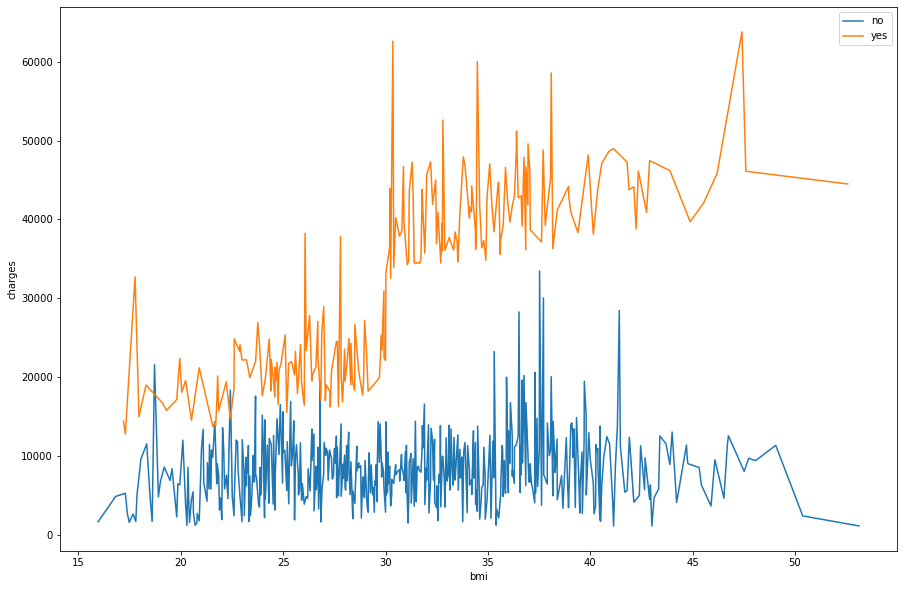

In [42]:
plt.figure(figsize=(15,10))
sns.lineplot(df["bmi"],df["charges"],hue=df["smoker"],ci=0)
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

## BMI vs Charges

No handles with labels found to put in legend.


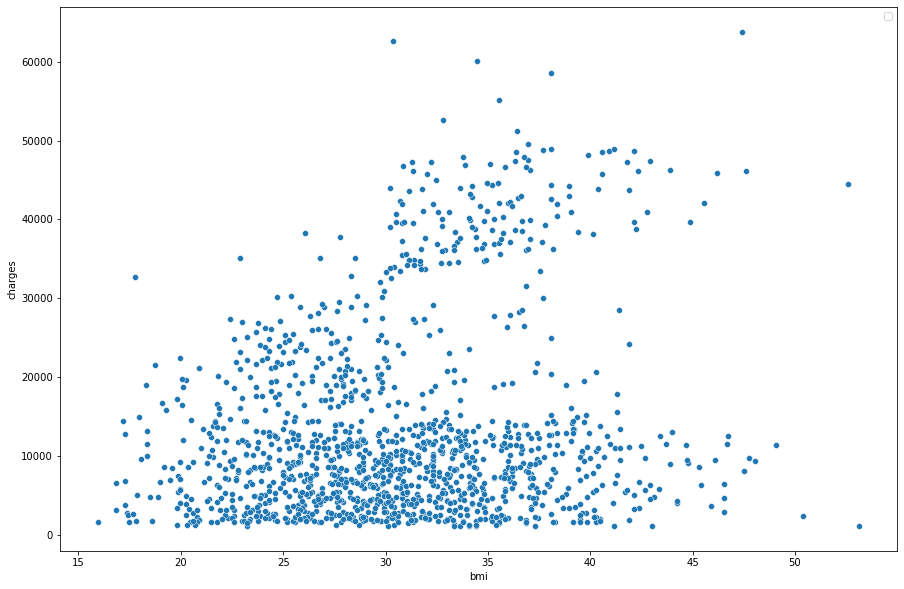

In [43]:
# scatterplot to show the relationship between BMI and charges

plt.figure(figsize=(15,10))
sns.scatterplot(df["bmi"],df["charges"],ci=0,palette="inferno")
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

<Figure size 2160x720 with 0 Axes>

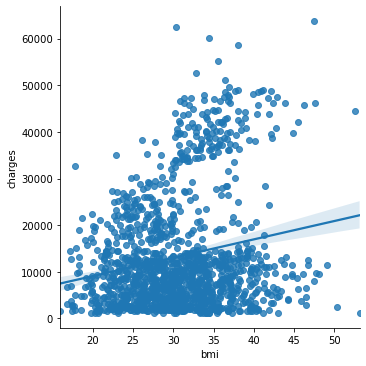

In [44]:
# lmplot to examine the relationship between BMI and Charges 

plt.figure(figsize=(30,10))
sns.lmplot(y='charges', x='bmi', data=df);

* Customers with higher BMI seem to have higher medical charges

# Hypothesis Testing

   ## Required Tests to Perform

* 1. Prove (or disprove) that the medical claims made by the people who smoke is greater than those who don't? [Hint- Formulate a hypothesis and prove/disprove it]

* 2. Prove (or disprove) with statistical evidence that the BMI of females is different from that of males.

* 3. Is the proportion of smokers significantly different across different regions? [Hint : Create a contingency table/cross tab, Use the function : stats.chi2_contingency()]

* 4. Is the mean BMI of women with no children, one child, and two children the same? Explain your answer with statistical evidence.

# Compare medical charges of smokers to non-smokers

-  Prove (or disprove) that the medical claims made by the people who smoke is greater than those who don't? [Hint- Formulate a hypothesis and prove/disprove it]

- The level of significance ($\alpha$) = 0.05.

- The sample size , Non-Smokers (N = 1064) and Smokers (N = 274) but since the population standard deviation ($\sigma$) is unknown, we have to use a t-test.

- Degree of Freedom: We have N-1 degrees of freedom : 1063 and 273 respectively

- Since the purpose of the test is to determine if medical claims by people who smoke is 'greater' than those who don't we would compare the means of both samples by using a two-sample, right tailed, t-test

## Test whether the T-Test assumptions are satisfied or not

* Continuous data - Yes, Medical Charges is measured on a continuous scale.
* Normally distributed populations - No, from the histogram and means analysis (below) of the sample the sample does not have a normal distirbution
* Independent populations - As we are taking random samples for two different type of users (smokers/non-smokers), the two samples are from two independent populations.
* Equal population standard deviations - No, the variances of both populations differ signifcantly, the population standard deviations may not be assumed to be equal.
* Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.

Because the sample sizes are sufficently large (n > 50) we can still use two sample T-test for this problem.

### Hypothesis Formulation

- $H_0: \mu_{smoker charges} = \mu_{non-smoker charges}$      (Smokers have same medical claims as non-smokers)

- $H_a: \mu_{smoker charges} > \mu_{non-smoker charges}  $      (Smokers have significantly greater medical claims compared to non-smokers)

## Compare the means of medical charges made by smokers to non-smokers

In [45]:
df.groupby('smoker')['charges'].mean()

smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64

### Shapiro-Wilk’s test

In [46]:
# Assumption 1: Normality
# import the required function
from scipy import stats

# find the p-value
w, p_value = stats.shapiro(df['charges']) 
print('The p-value is', p_value)

The p-value is 1.150477698013898e-36


* the mean of medical charges by smokers is significantly higher than that of non-smokers

In [47]:
df.groupby('smoker').count()

,age,sex,bmi,children,region,charges
smoker,,,,,,
no,1064,1064,1064,1064,1064,1064
yes,274,274,274,274,274,274


## Compare the variances of medical claims made by smokers to non-smokers

In [48]:
df.groupby('smoker')['charges'].std()

smoker
no      5993.781819
yes    11541.547176
Name: charges, dtype: float64

### Levene’s test

In [49]:
#Assumption 2: Homogeneity of Variance
#import the required function
from scipy.stats import levene
statistic, p_value = levene( df['charges'][df['smoker']=="no"], 
                                   df['charges'][df['smoker']=="yes"])
# find the p-value
print('The p-value is', p_value)

The p-value is 1.5593284881803726e-66


## Create subsets of smokers and non-smokers 

In [50]:
smoker_yes = df[df['smoker'] == 'yes'] # create subset of dataframe for smokers
smoker_yes.head() # print datasframe head to check

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
11,62,female,26.29,0,yes,southeast,27808.7251
14,27,male,42.13,0,yes,southeast,39611.7577
19,30,male,35.30,0,yes,southwest,36837.4670
23,34,female,31.92,1,yes,northeast,37701.8768


In [51]:
smoker_yes.describe()

,age,bmi,children,charges
count,274.000000,274.000000,274.000000,274.000000
mean,38.514599,30.708449,1.113139,32050.231832
std,13.923186,6.318644,1.157066,11541.547176
min,18.000000,17.195000,0.000000,12829.455100
25%,27.000000,26.083750,0.000000,20826.244213
50%,38.000000,30.447500,1.000000,34456.348450
75%,49.000000,35.200000,2.000000,41019.207275
max,64.000000,52.580000,5.000000,63770.428010


In [52]:
smoker_no = df[df['smoker'] == 'no'] # create subset of dataframe for non-smokers
smoker_no.head() # print datasframe head to check

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160


## Test hypothesis by finding p-value

Two-Sample Independent One-Sided T-Test w/ non-equal variances

In [53]:
#import the required functions
from scipy.stats import ttest_ind

# find the p-value
test_stat, p_value = ttest_ind(smoker_yes['charges'], smoker_no['charges'], equal_var = False, alternative = 'greater')
print('The test statistic is ', test_stat)
print('The p-value is ', p_value)

The test statistic is  32.751887766341824
The p-value is  2.94473222335849e-103


## Insight

As the p-value (~ 2.94473222335849e-103) is less than the level of significance we can reject the null hypothesis. Hence, we do have enough evidence to support the claim that the population of customers who smoke average more medical charges than customers that do not smoke. 

# Compare the BMI of Females to Males



-  Prove (or disprove) with statistical evidence that the BMI of females is different from that of males.

- The level of significance ($\alpha$) = 0.05.

- The sample size , N = 1338 but since the population standard deviation ($\sigma$) is unknown, we have to use a t-test.

- Degree of Freedom: We have N-1 degrees of freedom : 1337

- Since the purpose of the test is to determine if the BMI of Females is 'not equal' to the BMI of Males we would compare the means of both samples by using a two-sample, two-tailed, t-test

## Test whether the T-Test assumptions are satisfied or not

* Continuous data - Yes, the BMI is measured on a continuous scale.
* Normally distributed populations - Yes, from the histogram and means analysis of the sample we can assume normality
* Independent populations - As we are taking random samples for two different type of users (female/male), the two samples are from two independent populations.
* Equal population standard deviations - As the sample standard deviations are almost equal, the population standard deviations may be assumed to be equal.
* Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.

We can use two sample T-test for this problem.

### Hypothesis Formulation

- $H_0: \mu_{female bmi} = \mu_{male bmi}$      (Female BMI is the same as Male BMI)

- $H_a: \mu_{female bmi} \neq \mu_{male bmi}  $      (Females BMI differs significantly compared to Male BMI)

## Compare the means of Female BMI to Male BMI

In [54]:
df.groupby('sex')['bmi'].mean()

sex
female    30.377749
male      30.943129
Name: bmi, dtype: float64

* The means are sufficently similar

## Compare the variances of Female BMI to Male BMI

In [55]:
df.groupby('sex')['bmi'].std()

sex
female    6.046023
male      6.140435
Name: bmi, dtype: float64

* The variances are sufficently similar

## Create subsets of Females and Males

In [56]:
female = df[df['sex'] == 'female'] # create subset of dataframe for female
female.head() # print datasframe head to check

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92400
5,31,female,25.74,0,no,southeast,3756.62160
6,46,female,33.44,1,no,southeast,8240.58960
7,37,female,27.74,3,no,northwest,7281.50560
9,60,female,25.84,0,no,northwest,28923.13692


In [57]:
male = df[df['sex'] == 'male'] # create subset of dataframe for male
male.head() # print datasframe head to check

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
8,37,male,29.830,2,no,northeast,6406.41070


## Test hypothesis by finding the p-value

Two-Sample Independent Two-Tail T-Test w/ equal variances

In [58]:
#import the required functions
from scipy.stats import ttest_ind

# find the p-value
test_stat, p_value = ttest_ind(female['bmi'], male['bmi'], equal_var = True, alternative = 'two-sided')
print('The test statistic is ', test_stat)
print('The p-value is ', p_value)

The test statistic is  -1.696752635752224
The p-value is  0.08997637178984934


## Insight

As the p-value (~0.90) is not less than the level of significance we cannot reject the null hypothesis. Hence, we do not have enough evidence to support the claim that the BMI of Females is significantly different than that of Males. 

# Compare the proportions of smokers across different regions

- Is the proportion of smokers significantly different across different regions? 

- The level of significance ($\alpha$) = 0.05.

- Since the purpose of the test is to determine if the proportion of smokers is independent vs dependent on region we will create a contingency crosstab table and use the chi-squared contingency test to test for independence

### Hypothesis Formulation

- $H_0:$ Proportion of smokers is independent of region

- $H_a:$ Proportion of smokers depends on region

## Create a crosstab of smoker and region

In [59]:
# create the crosstab of smoker and region
my_crosstab = pd.crosstab(df.region, df.smoker, margins=False)
my_crosstab

smoker,no,yes
region,,
northeast,257,67
northwest,267,58
southeast,273,91
southwest,267,58


* Southeast (91) has the largest number of smokers across different regions followed by the Northeast (67) and the Northwest and Southwest both having (58)

## Use chi2_contingency function to assess p-value

Chi-Square test for independence

In [60]:
# import the required function
from scipy.stats import chi2_contingency

chi, p_value, dof, expected = chi2_contingency(my_crosstab)  
print(p_value)

0.06171954839170541


In [61]:
# pass my_crosstab variable to chi-squared function
stats.chi2_contingency(my_crosstab) 

(7.343477761407071,
 0.06171954839170541,
 3,
 array([[257.65022422,  66.34977578],
        [258.44544096,  66.55455904],
        [289.45889387,  74.54110613],
        [258.44544096,  66.55455904]]))

## Insight

* Although the p-value (~0.062) is close it is not less than the level of significance therefore we cannot reject the null hypothesis. Hence, we do not have enough evidence to support the claim that proportion of smokers depends on region.

# Compare the BMI of Women with 0,1, or 2 children

-  Prove (or disprove) with statistical evidence that the BMI of women 0, 1, or 3 children is the same or different.

- The level of significance ($\alpha$) = 0.05.

- The sample size , N = 662 but since the population standard deviation ($\sigma$) is unknown, we have to use a t-test.

- Degree of Freedom: We have N-1 degrees of freedom : 661

- Since the purpose of the test is to determine if the BMI of Females with 0, 1, or 2 children is the same or significantly different we will compare the means of the three samples by using a one-way ANOVA test.

## Test whether the ANOVA assumptions are satisfied or not

* Continuous data - Yes, the BMI is measured on a continuous scale.
* Normally distributed populations - Yes, the populations are normally distributed
* Independent populations - As we are taking random samples for different type of users we can assume they are independent populations.
* Equal population standard deviations - As the sample standard deviations are almost equal, the population standard deviations may be assumed to be equal.
* Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.

We can use multiple sample One-Way ANOVA test for this problem.

### Hypothesis Formulation

- $H_0: \mu_1 = \mu_2 = \mu_3$ The mean BMI of each sample are equal to each other

- $H_a:$ The mean BMI of at least one sample of women is different

## Use subset of Female created earlier

In [62]:
female = df[df['sex'] == 'female'] # create subset of dataframe for female
female.head() # print datasframe head to check

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92400
5,31,female,25.74,0,no,southeast,3756.62160
6,46,female,33.44,1,no,southeast,8240.58960
7,37,female,27.74,3,no,northwest,7281.50560
9,60,female,25.84,0,no,northwest,28923.13692


## Create subset of Female < 3 children

In [63]:
female_child = female[female['children'] < 3] # create subset of dataframe for female
female_child.head() # print datasframe head to check

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92400
5,31,female,25.74,0,no,southeast,3756.62160
6,46,female,33.44,1,no,southeast,8240.58960
9,60,female,25.84,0,no,northwest,28923.13692
11,62,female,26.29,0,yes,southeast,27808.72510


## Check sample means

In [64]:
female_child.groupby('children') ['bmi'].mean()

children
0    30.361522
1    30.052658
2    30.649790
Name: bmi, dtype: float64

* Mean BMI of females with 0-3 children are very close to equal

### Test normality using the Shapiro-Wilk's Test

We will test the null hypothesis

>$H_0:$ Female BMI follows a normal distribution against

against the alternative hypothesis

>$H_a:$ Female BMI does not follow a normal distribution

In [65]:
# Assumption 1: Normality
# import the required function
from scipy import stats

# find the p-value
w, p_value = stats.shapiro(female_child['bmi']) 
print('The p-value is', p_value)

The p-value is 0.010864038951694965


* Since p-value of the test is less than 0.05, we reject the null hypothesis that the samples follow the normal distribution. However, since we are performing an ANOVA test we do not require normal distribution

### Levene’s test

We will test the null hypothesis

>$H_0$: All the population variances are equal

against the alternative hypothesis

>$H_a$: At least one variance is different from the rest

In [66]:
#Assumption 2: Homogeneity of Variance
#import the required function
from scipy.stats import levene
statistic, p_value = levene( female_child['bmi'][female_child['children']== 0], 
                                   female_child['bmi'][female_child['children']== 1], 
                                   female_child['bmi'][female_child['children']== 2])
# find the p-value
print('The p-value is', p_value)

The p-value is 0.3899432394522804


Since the p-value is large, we fail to reject the null hypothesis of homogeneity of variances.

## Find p-value using ANOVA test
One-way ANOVA test

In [67]:
#import the required function
from scipy.stats import f_oneway

# perform one-way anova test
test_stat, p_value = f_oneway(female_child.loc[female_child['children'] == 0, 'bmi'],
                              female_child.loc[female_child['children'] == 1, 'bmi'],
                              female_child.loc[female_child['children'] == 2, 'bmi'])
print('The p-value is ' + str(p_value))

The p-value is 0.7158579926754841


### Insight

As the p-value (~ 0.7158) is not less than the significance level (0.05), we cannot reject the null hypothesis. Hence, we do not have enough statistical significance to conclude that the BMI of women with 0, 1, or 2 children is different at a 5% significance level.

## End